# Coursework II Question 1 - CALIFORNIA HOUSE PRICE PREDICTION

Please List Members of Team and Student IDs below:

Member 1:

Member 2:

Member 3:

Which member of the team is responsible for this notebook: Wei_52278

## INSTRUCTIONS

The purpose of this question is to find the best model for predicting house prices in California. I have provided a dataset on the Blackboard which contains features and the price. The file is called housing.csv and is in the data folder. This is a version of the data based on this source.

http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Some of the data fields are log scaled values so should not be interpeted literally, e.g. number of bedrooms is not the number of bedrooms but the log of number of bedrooms divided by population.

In the following you are to 


1 - Load the data into a Pandas dataframe

2 - Examine the dataframe for missing data and decide how to treat these

3 - Visualise the target price and make any adjustments that you think would help. 

4 - Try to see which features have the best explanatory power. 

5 - Also, deal with categorical data and use feature standardization

6 - Use the following models - Linear Regression, Decision Tree Regressor, Support Vector Regressor (SVR)

7 - Use training and testing (70:30 train test split) to identify the best model

9 - Write a summary explaining your results.

####################################################

do you mean: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

load the data into a pandas dataframe

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import preprocessing

In [5]:
import numpy as np

In [6]:
df = pd.read_csv('housing.csv')

examine the missing data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


only 'total_bedrooms' data is missing

to visualize all the features and labels.

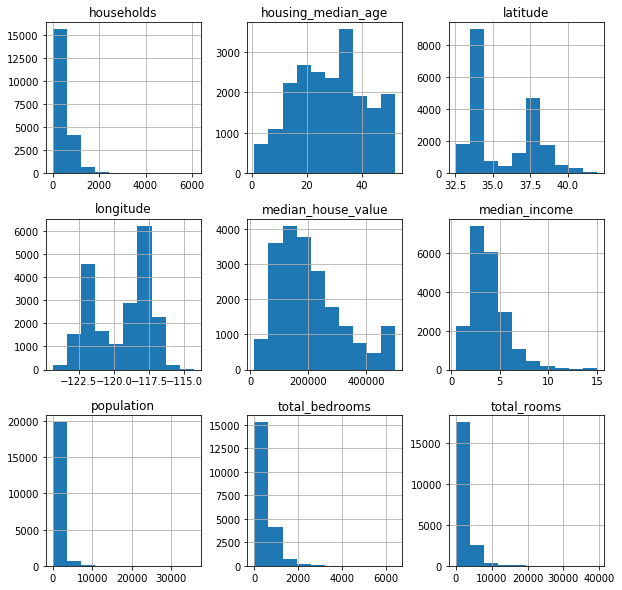

In [8]:
df.hist(figsize=(10,10));

so examine the total_bedrooms with house_value

In [9]:
prices = df['median_house_value']

In [10]:
def plotFeature(fea):
    plt.figure(figsize=(8,6))
    plt.scatter(df[fea], prices)
    plt.title(fea)
    plt.xlabel(fea)
    plt.ylabel('price')

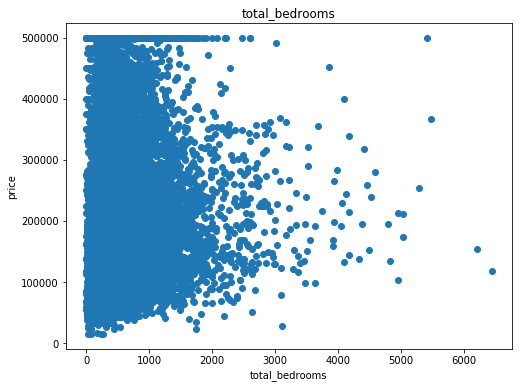

In [11]:
plotFeature('total_bedrooms')

    see from the scatter plot that, total bedroom does not have strong relation to the target price
    decision: fill data with average value

In [12]:
av_ = df['total_bedrooms'].mean()

In [13]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(av_)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
df_1 = df.drop(['median_house_value'], axis=1)

In [16]:
df_1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [17]:
c = []
for i in df_1.columns:
    c.append(i)

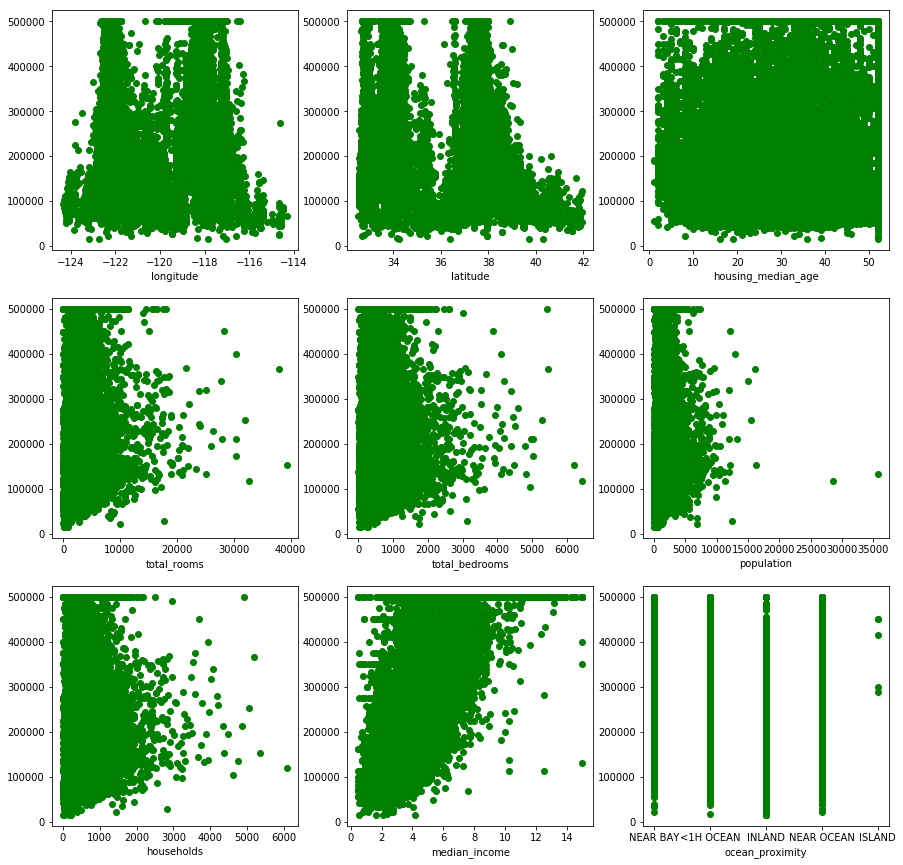

In [18]:
plt.figure(figsize=(15, 15))
n = 1
for i in c:
    plt.subplot(3,3,n)
    plt.plot(df_1[i], prices,'go')
    plt.xlabel(i)
    n += 1

to dummy the ocean_proximity feature

In [19]:
ocean_proxi_oh = pd.get_dummies(df_1['ocean_proximity'])

to perform standardize:

In [20]:
df_sd = df_1.drop(['ocean_proximity'], axis=1)

In [21]:
scaler = preprocessing.StandardScaler()

In [22]:
df_scaled = scaler.fit_transform(df_sd)
df_scaled = pd.DataFrame(df_scaled, columns=df_sd.columns)

In [23]:
df_cleaned = df_scaled.join(ocean_proxi_oh)

In [24]:
df_cleaned = df_cleaned.join(df['median_house_value'])

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
<1H OCEAN             20640 non-null uint8
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
median_house_value    20640 non-null float64
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


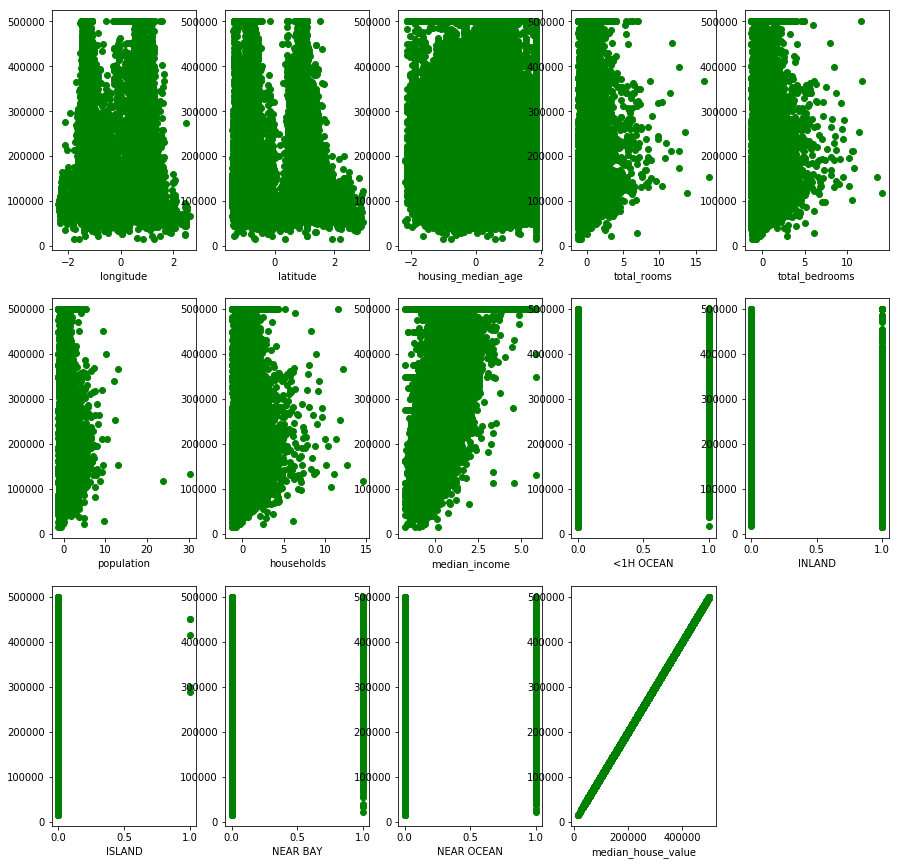

In [26]:
col_name = []
for i in df_cleaned.columns:
    col_name.append(i)

plt.figure(figsize=(15, 15))
n = 1
for i in col_name:
    plt.subplot(3,5,n)
    plt.plot(df_cleaned[i], prices,'go')
    plt.xlabel(i)
    n += 1

start of model fitting

In [27]:
X = df_cleaned.drop(['median_house_value'], axis=1)
y = df_cleaned['median_house_value']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1278)

## linear regression

In [37]:
from sklearn import linear_model

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
regr = linear_model.LinearRegression()

In [52]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_pred_train = regr.predict(X_train)

In [55]:
print("Mean Squared Error: %.2f" %mean_squared_error(y_train, y_pred_train))
print("R Squared: %.2f" %r2_score(y_train, y_pred_train))

Mean Squared Error: 4690141056.58
R Squared: 0.65


out of sample test

In [56]:
y_pred_test = regr.predict(X_test)

In [57]:
print("Mean Squared Error: %.2f" %mean_squared_error(y_test, y_pred_test))
print("R Squared: %.2f" %r2_score(y_test, y_pred_test))

Mean Squared Error: 4802599295.12
R Squared: 0.64


determine the most important features -- 

In [36]:
import linReg_mst as lin_mst

In [37]:
lin_mst.theMstI(df_cleaned, 'median_house_value')

by excluding feature longitude the accuracy of test set is: 0.637746
by excluding feature latitude the accuracy of test set is: 0.638309
by excluding feature housing_median_age the accuracy of test set is: 0.638175
by excluding feature total_rooms the accuracy of test set is: 0.648099
by excluding feature total_bedrooms the accuracy of test set is: 0.646674
by excluding feature population the accuracy of test set is: 0.622556
by excluding feature households the accuracy of test set is: 0.644959
by excluding feature median_income the accuracy of test set is: 0.412704
by excluding feature <1H OCEAN the accuracy of test set is: 0.648675
by excluding feature INLAND the accuracy of test set is: 0.648675
by excluding feature ISLAND the accuracy of test set is: 0.648675
by excluding feature NEAR BAY the accuracy of test set is: 0.648675
by excluding feature NEAR OCEAN the accuracy of test set is: 0.648675


it's the income that has the most important power

####################################################

## Decision Tree regressor
    when predicted value is a number: use regression tree

In [40]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [44]:
from graphviz import Source

In [78]:
tree_reg = DecisionTreeRegressor(max_depth=7)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

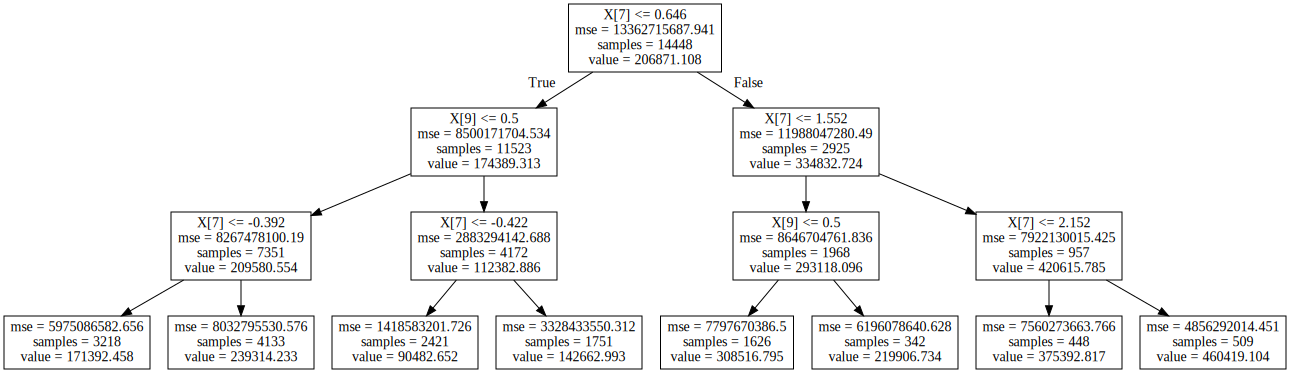

In [59]:
Source(export_graphviz(tree_reg, out_file=None))

large MSE value, similar as linear regression.

In [79]:
y_pred_train = tree_reg.predict(X_train)

In [80]:
tree_mse = (mean_squared_error(y_train,y_pred_train))

In [81]:
tree_mse

3749232424.710792

In [82]:
y_pred_test = tree_reg.predict(X_test)

In [83]:
tree_mse_test = mean_squared_error(y_test, y_pred_test)

In [84]:
tree_mse_test

4370341703.541074

by increasing 'max_depth', performance could be enhanced, results a better score then linear regression, but there's a tendency overfitting.

##################################################################

## support vector REGRESSOR

    without kernels

In [42]:
from sklearn.svm import SVR

‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [64]:
svm_reg = SVR(kernel='poly')

In [65]:
svm_reg.fit(X_train, y_train)

C:\Users\freakylemon\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred_train = svm_reg.predict(X_train)

In [67]:
y_pred_test = svm_reg.predict(X_test)

In [68]:
svm_mse = mean_squared_error(y_test, y_pred_test)

In [69]:
svm_mse

13886685995.992334

    Summary: 
    seems that decision tree with max_depth higher than 5 can perform better than other two(but it may have higher possibility overfitting.)
    I've tried several available kernel within support vector regressor, but on mean squared error, they did not differ much between one other.
    linear regression tend to be the best model.